In [44]:

# import cv2
# import sklearn
# import PIL
# from matplotlib import cm

# Сверточная нейронная сеть

In [25]:
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm import tqdm

import numpy as np
import sys
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ]
)

In [8]:
mnist_train = torchvision.datasets.MNIST(
    './mnist/',
    train=True,
    download=True,
    transform=transform
)

mnist_val = torchvision.datasets.MNIST(
    './mnist/',
    train=False,
    download=True,
    transform=transform
)

train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=True)

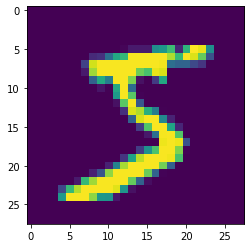

In [9]:
plt.imshow(mnist_train[0][0].squeeze(0).numpy().reshape([28, 28]))

In [79]:
def train(model, optimizer, n_epochs=5, plot=True, verbose=True, validate_each=2, loss_fn=None):
    loss_fn = loss_fn or F.cross_entropy
    test_loss_epochs = []
    test_accuracy_epochs = []

    for epoch in range(n_epochs):
        
        # обучение
        print(f'Train epoch {epoch}', end=' ')
        for x_train, y_train in tqdm(train_dataloader):
            y_pred = model(x_train)
            loss = loss_fn(y_pred, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # валидация
        if epoch % validate_each == 0 or (epoch + 1) % n_epochs == 0:
            print('\nValidate', end=' ')
            val_loss = []
            val_accuracy = []
            with torch.no_grad():
                for x_val, y_val in tqdm(val_dataloader):
                    y_pred = model(x_val)
                    loss = loss_fn(y_pred, y_val)
                    val_loss.append(loss.numpy())
                    val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())

            clear_output(True)
            test_loss_epochs.append(np.mean(val_loss))
            test_accuracy_epochs.append(np.mean(val_accuracy))
            if verbose:
                sys.stdout.write('\rEpoch {0} | Test validation Loss: {1:.3f}\tAccuracy: {2:.3f}'.format(
                            epoch, test_loss_epochs[-1], test_accuracy_epochs[-1]))
            if plot:
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1)
                plt.plot(test_loss_epochs, label='Loss')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Loss', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.subplot(1, 2, 2)
                plt.plot(test_accuracy_epochs, label='Accuracy')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Accuracy', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.show()

In [15]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.Tanh(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Epoch 4 | Test validation Loss: 0.075	Accuracy: 0.977

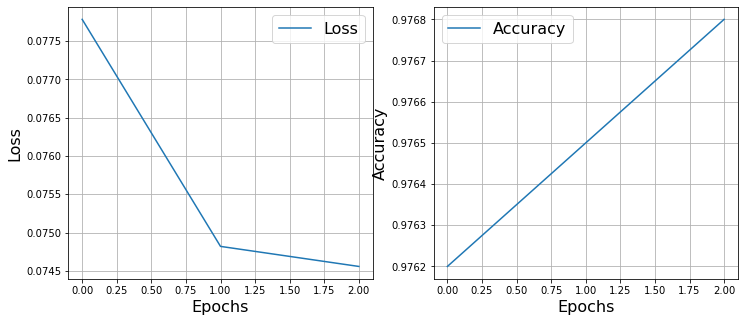

In [59]:
train(model, optimizer, n_epochs=5, validate_each=3)

In [66]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),  # grayscale
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон 
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Epoch 4 | Test validation Loss: 0.074	Accuracy: 0.976

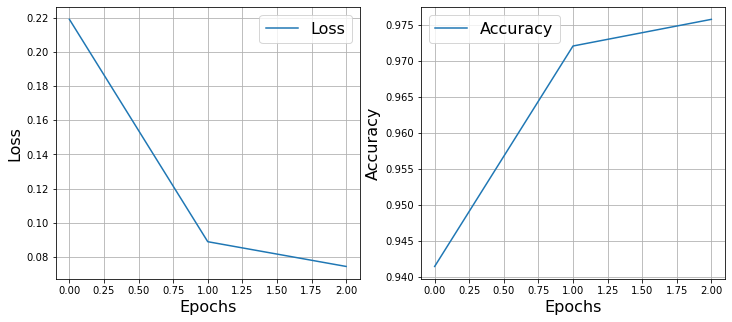

In [67]:
train(model, optimizer, n_epochs=5, validate_each=2)

Epoch 4 | Test validation Loss: 0.171	Accuracy: 0.951

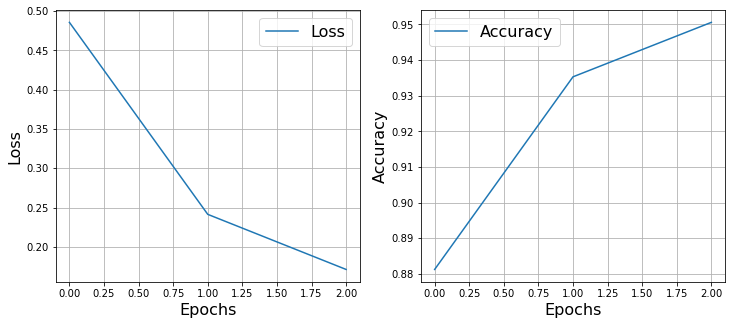

In [108]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),  # grayscale
    nn.Tanh(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон 
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.Tanh(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, optimizer)

Epoch 4 | Test validation Loss: 0.044	Accuracy: 0.912

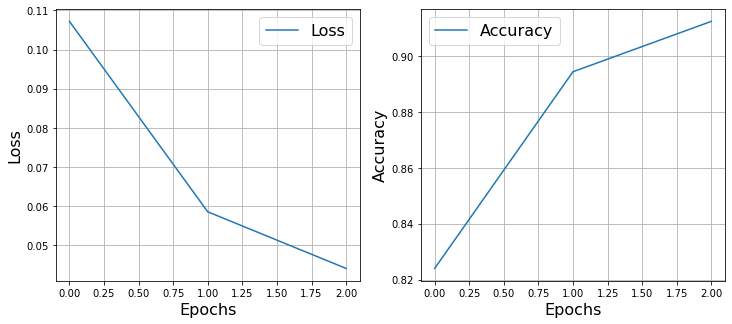

In [109]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),  # grayscale
    nn.Tanh(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон 
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.Tanh(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, optimizer, loss_fn=nn.MultiMarginLoss())  # Используем Hinge Loss


Epoch 4 | Test validation Loss: 0.143	Accuracy: 0.957

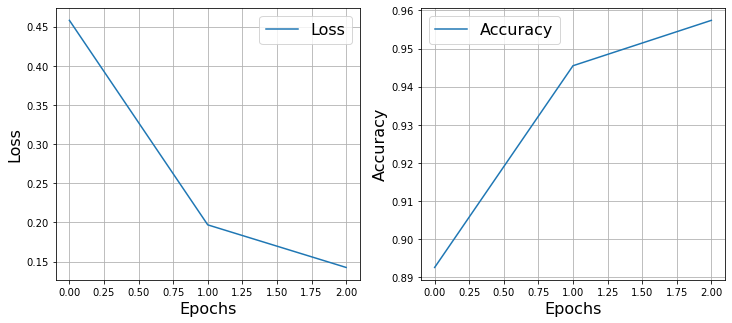

In [110]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),  # grayscale
    nn.Tanh(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон 
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.Tanh(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, optimizer, loss_fn=nn.CrossEntropyLoss())

Epoch 4 | Test validation Loss: 0.077	Accuracy: 0.977

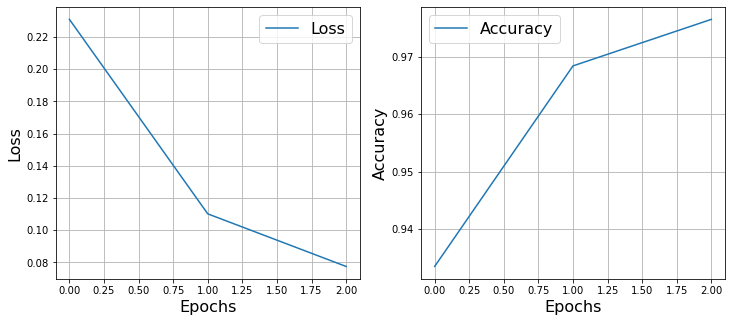

In [113]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),  # grayscale
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон 
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, optimizer, loss_fn=nn.CrossEntropyLoss())

### Функции ошибки, параметры, оптимизаторы

In [ ]:
loss_fns = [F.cross_entropy(), nn.MultiMarginLoss(), nn.CrossEntropyLoss()] # nn.CrossEntropyLoss() дает лучший скор

Epoch 4 | Test validation Loss: 0.053	Accuracy: 0.982

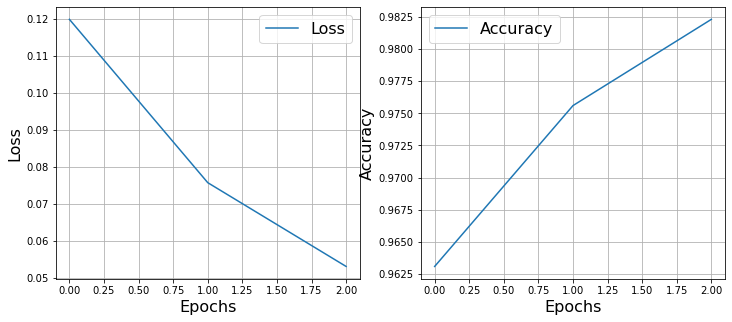

In [117]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3),  # grayscale
    nn.Tanh(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон 
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.Tanh(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train(model, optimizer, loss_fn=nn.CrossEntropyLoss())

Epoch 4 | Test validation Loss: 0.071	Accuracy: 0.978

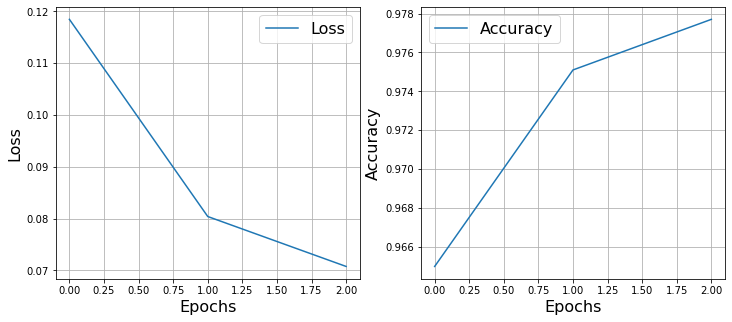

In [119]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=4),  # grayscale
    nn.Tanh(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон 
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.Tanh(),
    nn.Linear(128, 10)
)

# optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01) # 0.978
# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99) # 0.962
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # 0.978
train(model, optimizer, loss_fn=nn.CrossEntropyLoss())

Epoch 4 | Test validation Loss: 0.051	Accuracy: 0.986

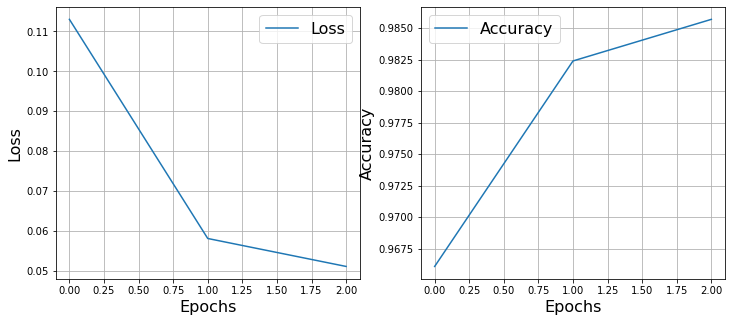

In [132]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=4),  # grayscale
    nn.Tanh(),
    nn.MaxPool2d(kernel_size=2),   # сократим изображение в 5 раз по каждой из сторон 
    nn.Flatten(),
    nn.Linear(12*12*10, 64),
    nn.Tanh(),
    nn.Linear(64, 10)
)

# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99) # 0.981
# optimizer = torch.optim.Adadelta(model.parameters(), lr=1.0, rho=0.9) # 0.984
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # 0.986
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01) # 0.986
train(model, optimizer, loss_fn=nn.CrossEntropyLoss())

Обучите сверточную нейронную сеть на датасете MNIST, взяв любой другой оптимизатор (кроме SGD) и любую другую функцию ошибки (кроме cross-entropy loss). Попробуйте поварьировать параметры: кол-во ядер, `kernel_size` и побить текущий бейзлайн в `0.9746`. Выведите количество обучаемых параметров.    
Какого качества удалось достичь? Попробуйте залоггировать Ваши результаты - построить графики того, как менялись метрики качества (accuracy, loss) с течением эпох, включить логгирование, сравнить результаты между собой при разных параметрах.

Любые дополнительные улучшения (как по методам, так и по коду пайплайна) приветствуются!

*Цель:* выработать навык обучения нейронных сетей (в частности сверточных) на основе средств PyTorch, начиная от загрузки датасетами и заканчивая выводами результатов, их логгированием, сравнением и анализом.

Epoch 4 | Test validation Loss: 0.046	Accuracy: 0.983

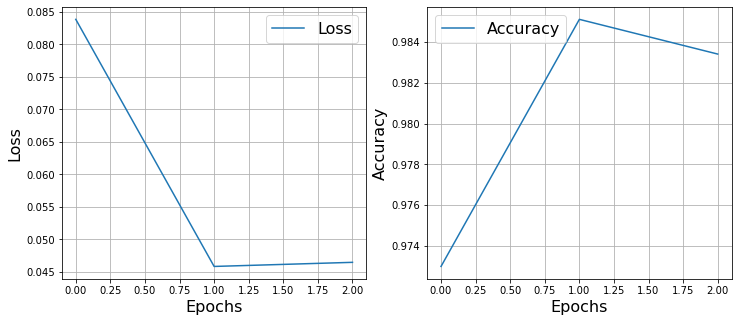

In [163]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=8),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3),
    nn.Flatten(),
    nn.Linear(490, 128),
    nn.ReLU(),
    nn.Linear(128, 24),
    nn.ReLU(),
    nn.Linear(24, 10)
)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01) # 0.986
train(model, optimizer, loss_fn=nn.CrossEntropyLoss())

Epoch 4 | Test validation Loss: 0.043	Accuracy: 0.986

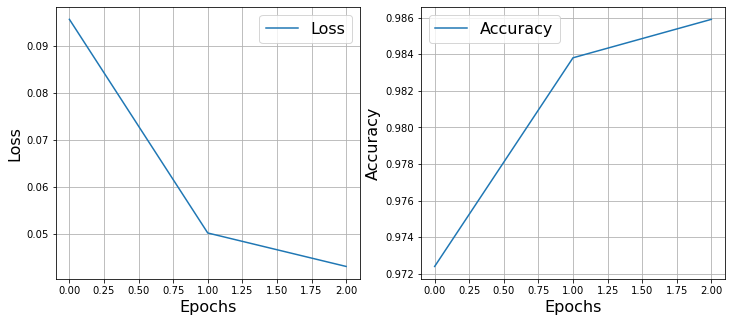

In [136]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),  # grayscale
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),   # сократим изображение в 5 раз по каждой из сторон 
    nn.Flatten(),
    nn.Linear(12*12*10, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005, weight_decay=0.01) # 0.986
train(model, optimizer, loss_fn=nn.CrossEntropyLoss())

## Best

Epoch 4 | Test validation Loss: 0.043	Accuracy: 0.986

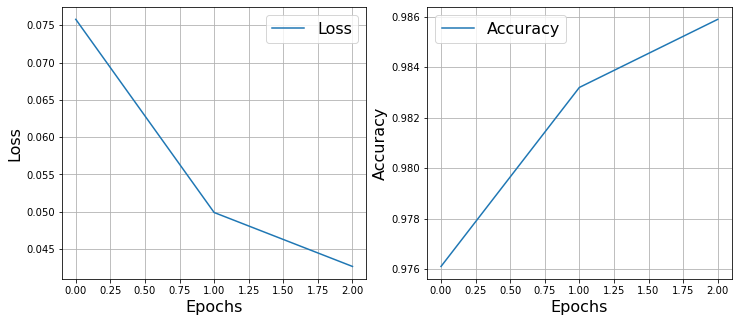

In [154]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=12, kernel_size=4),  # grayscale
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон 
    nn.Flatten(),
    nn.Linear(432, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01) # 0.986
train(model, optimizer, loss_fn=nn.CrossEntropyLoss())